### Exploratory Data Analysis for Bike Share Data

**Imports**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_train = pd.read_csv("Data/train.csv")

In [5]:
df_test = pd.read_csv("Data/test.csv")

**General data Info**

In [6]:
df_train.shape

(10886, 12)

In [7]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


We see that all of the variables are numeric except for the datetime column which is datatime object. We can parse this column and create new columns for the year, month, day and time. 

In [8]:
# no missing variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


**Handling datetime**

In [9]:
df_train['date'] = df_train.datetime.apply(lambda x: x.split()[0])

The time only gives the hour of the day (0-24), so we can remove the colon notation and just leave the hour number. 

In [10]:
df_train['time'] = df_train.datetime.apply(lambda x: int(x.split()[1].split(":")[0]))

In [11]:
df_train['year'] = df_train.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
df_train['month'] = df_train.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').month)
df_train['day'] = df_train.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').day)
df_train['weekday'] = df_train.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').weekday())

Next we want to change some of the nominal variables to be categories so that they do not get misinterpreted as ordinal

In [12]:
# nominal_variables = ["time","weekday","month","season","weather","holiday","workingday"]
# for var in nominal_variables:
#     df_train[var] = df_train[var].astype("category")

In [13]:
df_train = df_train.drop('datetime', axis = 1)

In [14]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year,month,day,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,2011,1,1,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,2011,1,1,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,2011,1,1,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,2011,1,1,5


**Summary Statistics**

In [15]:
df_train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

**Visualizations**

In [16]:
# use seaborn darkgrid style
sns.set_style('darkgrid')

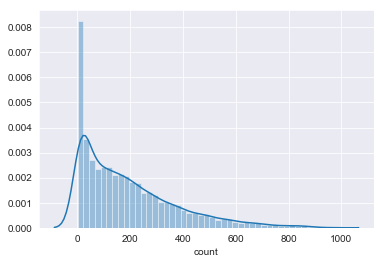

In [17]:
_ = sns.distplot(df_train['count'])

Let's examine the count by before noon vs. afternoon

In [0]:
_ = sns.distplot(df_train[df_train.time < 12]['count'], label='before noon')
_ = sns.distplot(df_train[df_train.time >= 12]['count'], label='after noon')
_ = plt.legend()

NameError: ignored

We see that a large portion of the hours with high bike rentals are in the afternoon. This could be an important feature for predictions.

In [0]:
_ = sns.catplot(x='day', y='count', data=df_train, kind='bar', aspect=2)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [0]:
_ = sns.relplot(x='hour', y='count', data=df_train)

AttributeError: module 'seaborn' has no attribute 'relplot'

weekdays vs. weekends

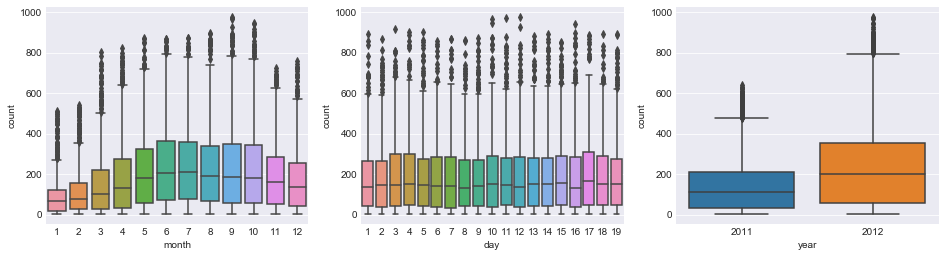

In [0]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
_ = sns.boxplot(x='month',y='count',data=df_train, ax=ax[0])
_ = sns.boxplot(x='day',y='count',data=df_train, ax=ax[1])
_ = sns.boxplot(x='year',y='count',data=df_train, ax=ax[2])

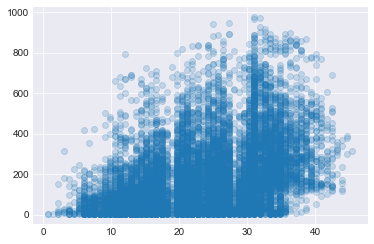

In [0]:
_ = plt.scatter(x='atemp',
                y='count',
                data=df_train,
                alpha=0.2
               )

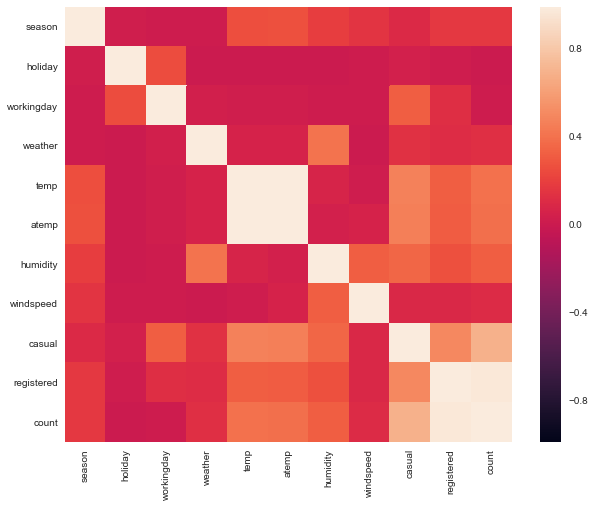

In [0]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr().abs(), vmin = -0.99, vmax = 0.99)